# Prepare Data

Plan - Acquire - **Prepare** - Explore - Model - Deliver

**Goal**: Prepare, tidy, and clean the data so that it is ready for exploration and analysis.

**Input:** 1 or more dataframes acquired through the "acquire" step.

**Output:** 1 dataset split into 3 samples in the form of dataframes: train, validate & test.

**Artifact:** `prepare.py`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own acquire module
import acquire

In [2]:
df = acquire.get_titanic_data()

# STEP 1: Summarizing

In [3]:
# rows & columns
df.shape

(891, 13)

In [6]:
# view first n rows
n = 2
df.head(n)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0


In [8]:
# Get information about the dataframe: column names, rows, datatypes, non-missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [9]:
# Get summary statistics for numeric columns.
df.describe()

,passenger_id,survived,pclass,age,sibsp,parch,fare,alone
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.602694
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.489615
min,0.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,445.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,667.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,890.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

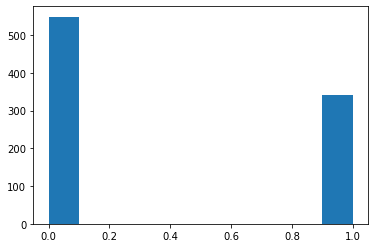

In [12]:
# Check out distributions of numeric columns.
plt.hist(df['survived'])

In [14]:
#speed up and create a loop
num_colos = df.columns[[df[col].dtype == 'int64' for col in df.columns]]0

In [15]:
num_colos

Index(['passenger_id', 'survived', 'pclass', 'sibsp', 'parch', 'alone'], dtype='object')

(array([[ 89.,  89.,  89.,  89.,  89.,  89.,  89.,  89.,  89.,  90.],
        [891.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [891.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [891.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [891.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [891.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([  0.,  89., 178., 267., 356., 445., 534., 623., 712., 801., 890.]),
 <a list of 6 BarContainer objects>)

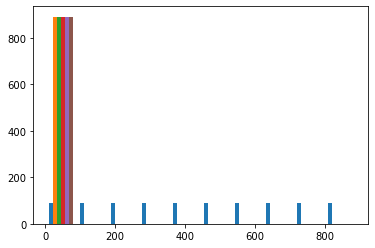

In [16]:
plt.hist(df[num_colos])

In [21]:
# Use .describe with object columns.
obj_cols = df.columns[[df[col].dtype == 'O' for col in df.columns]]

In [22]:
for col in obje_cols:
    print(df[col].value_counts())
    print(df[col].value_coints(normalize=True, dropna=False))
    print('----------------------------')

NameError: name 'obje_cols' is not defined

In [24]:
# Create bins for fare using .value_counts.
# Using sort = false will sort by bin values as opposed to the frequency counts.
df.fare.value_counts(bins=5, sort=False)

(-0.513, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(307.398, 409.863]      0
(409.863, 512.329]      3
Name: fare, dtype: int64

In [25]:
# Find columns with missing values and the total of missing values.
missing = df.isnull().sum()
missing[missing > 0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

# STEP 2: Cleaning the Data

#### Duplicate Data?

In [27]:
# Drop duplicates...run just in case; reassign and check the shape of my data.
print(df.shape)
df = df.drop_dupi
cates()
print(df.shape)

(891, 13)


AttributeError: 'DataFrame' object has no attribute 'drop_dupi'

#### Missing Data?

In [ ]:
# Drop columns with too many missing values for now and reassign; check the shape of my data.
cols_to_drop = ['deck', 'embark', 'class', 'age']
df = df.drop(columns = cols_to_drop)
df.sahpe

In [28]:
# Validate that the columns are dropped.
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


We could fill `embark_town` with most common value, 'Southampton', by hard-coding the value using the `fillna()` function, as below. Or we could use an imputer. We will demonstrate the imputer after the train-validate-test split.

In [ ]:
# Run .fillna() on the entire df.
df['embark_town'] = df.embark_town.fillna(value='Southampton')

In [ ]:
# Validate that missing values in embark_town have been handled.
df.embark_town 64

#### Outliers?

#### Erroneous Values?

#### Correct Datatypes?

#### Text Normalization?

No text normalization issue detected 

#### Tidy Data?

In [30]:
# Each column should only represent one variable
# Each row should be one observation (passenger)
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,None,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,None,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,None,Southampton,1


#### Create New Variables?

Get dummy vars for sex and embark_town

dummy_na: create a dummy var for na values, also?
drop_first: drop first dummy var (since we know if they do not belong to any of the vars listed, then they must belong to the first one that is not listed).

In [ ]:
# Concatenate the dummy_df dataframe above with the original df and validate.

#### Rename Columns?

In [ ]:
No need to rename data

#### Scaling Data?

In [ ]:
# You want to scale data when you're using methods based on measures
# of how far apart data points, like support vector machines
# or k-nearest neighbors.

### Lets not do that all over again repeatedly...lets make a function

In [ ]:
def clean data():
    """This function cleans the data """
    df= drop.columns

Testing that the function does what we intend for it to do:

# Step 3: Splitting

In [ ]:
# 20% test, 80% train_validate
# then of the 80% train_validate: 30% validate, 70% train. 

In [ ]:
# Observe split

### Turn it into a function

Testing that the function is doing what we intend for it to do:

# Alternative Method: Impute

We can impute values using the mean, median, mode (most frequent), or a constant value. We will use sklearn.imputer.SimpleImputer to do this.

1. Create the imputer object, selecting the strategy used to impute (mean, median or mode (strategy = 'most_frequent').
1. Fit to train. This means compute the mean, median, or most_frequent (i.e. mode) for each of the columns that will be imputed. Store that value in the imputer object.
1. Transform train: fill missing values in train dataset with the stored value
1. Transform validate: fill missing values in validate dataset with the stored value
1. Transform test: fill missing values in test dataset with the stored value

In [ ]:
# Get fresh Titanic data to use with missing values in embark_town again.

In [ ]:
# ONLY look at train dataset after we split our data.

Create the `SimpleImputer` object, which we will store in the variable `imputer`. In the creation of the object, we will specify the strategy to use (mean, median, most_frequent). Essentially, this is creating the instructions and assigning them to a variable, `imputer`.

`Fit` the imputer to the columns in the training df. This means that the imputer will determine the most_frequent value, or other value depending on the strategy called, for each column.

It will store that value in the imputer object to use upon calling `transform`. We will call `transform` on our train, validate, and test datasets to fill any missing values.

In [ ]:
# Validate that there are no longer any Null values in embark_town.

### Simplify our life with a function

Note: the `clean_data()` function is already dealing with missing values. If we want to use imputation, we will need to go back and tweak our earlier function.

In [ ]:
# Yay functions!

### We can create a function made of our other functions

In [ ]:
# Another function? YES PLZ!

In [ ]:
# Acquire fresh Titanic data to test my funtion.

In [ ]:
# Run final prepare function and validate what that the function is working properly.

# Exercise Time